In [4]:
"""Adapted from https://de.dariah.eu/tatom/working_with_text.html"""

'Adapted from https://de.dariah.eu/tatom/working_with_text.html'

In [9]:
#! usr/bin/env python3

import os
from survey_coll import survey_output
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
coll_fields_dict = dict()

for k, v in survey_output.items():
    slim_k = k.replace(' ', '')
    for value_item in v:
        if value_item in coll_fields_dict.keys():
            coll_fields_dict[value_item] += '{}{}'.format(' ', slim_k)
        else:
            coll_fields_dict[value_item] = slim_k

In [11]:
# print(coll_fields_dict)

{'p16313coll42': 'Relation CatalogDate Creator Rights Source Archivalfile Description Datecreated Format Fulltext Language Contributors Datemodified Coverage CONTENTdmnumber FiletoLoad DigitizedBy Type OCLCnumber ColorMode(Archival) Hardware/Software(Archival) Publisher ImageManipulation(Archival) ObjectFileName Notes CONTENTdmfilename CatalogedBy Title ImageBit-Depth(Archival) Subject OriginalFileName ImageResolution(Archival) DigitizedDate Extent(Archival) Identifier Date FileSize(Archival)', 'FJC': 'Relation CatalogDate Rights Source Description Datecreated Format Fullresolution Language Contributors Datemodified Coverage CONTENTdmnumber Type OCLCnumber Publisher Notes CONTENTdmfilename Cataloger ContactInformation Title ObjectFileName Subject Identifier Date Photographer', 'THW': 'PrincipleInterviewers Object_File_Name Relation ListofInterviewees Creator Rights Source ACCESSINTERVIEWS Description Datecreated Format Fullresolution Language Datemodified Coverage CONTENTdmnumber Type 

In [43]:
from owner_col import owner_col_dict

print(len(coll_fields_dict))
# remove Tulane collections
for owner in owner_col_dict.keys():
    if "tulane" in owner.lower():
        for coll in owner_col_dict[owner]:
            if coll in coll_fields_dict:
                coll_fields_dict.pop(coll)
# remove collections marked for deletion
for coll in ('DUBLIN2', 'p15140coll57', 'p16313coll49', 'WIS'):
    if coll in coll_fields_dict.keys():
        coll_fields_dict.pop(coll)
# remove collections with no objects
for coll in ('LST', 'p15140coll11', 'p16313coll61', 'p16313coll67', 'p16313coll87', 'p16313coll90', 'p16313coll98', 'p120701coll11', 'p120701coll14'):
    if coll in coll_fields_dict.keys():
        coll_fields_dict.pop(coll)
print(len(coll_fields_dict))

198
198


In [44]:
current_user = os.path.expanduser("~")
desktop = os.path.join(os.path.expanduser("~"), "Desktop")

if 'coll_tags_as_files' not in os.listdir(desktop):
    os.mkdir('{}/coll_tags_as_files/'.format(desktop))
for k,v in coll_fields_dict.items():
    name = '{}/coll_tags_as_files/{}.txt'.format(desktop, k)
    with open(name, 'w') as f:
        f.write(v)

In [45]:
filenames = [name for name in os.listdir('{}/coll_tags_as_files/'.format(desktop))]
# print(filenames)

In [46]:
vectorizer = CountVectorizer(input='filename')

os.chdir('{}/coll_tags_as_files/'.format(desktop))
dtm = vectorizer.fit_transform(filenames)  # a sparse matrix

vocab = vectorizer.get_feature_names()  # a list

In [47]:
# print(dir(dtm), dtm)
print(type(dtm))

<class 'scipy.sparse.csr.csr_matrix'>


In [48]:
dtm = dtm.toarray()  # convert to a regular array

vocab = np.array(vocab)

In [49]:
# print(list(vocab))
# for n, i in enumerate(vocab):
    # print(dtm[0, n])

In [50]:
from sklearn.metrics.pairwise import cosine_similarity

dist = 1 - cosine_similarity(dtm)

In [51]:
# print(np.round(dist, 2))
# print(dist[1, 3])

<IPython.core.display.Javascript object>


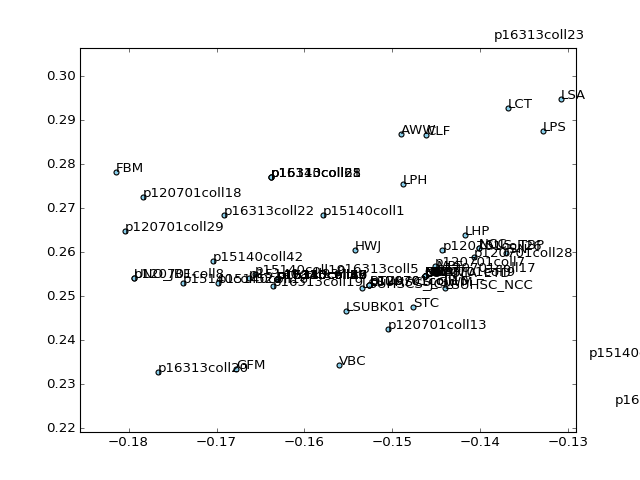

In [60]:
# %matplotlib inline
%matplotlib notebook
import os
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)
xs, ys = pos[:, 0], pos[:, 1]

# short versions of filenames:
# convert 'data/austen-brontë/Austen_Emma.txt' to 'Austen_Emma'

names = [os.path.basename(fn).replace('.txt', '') for fn in filenames]

# color-blind-friendly palette

for x, y, name in zip(xs, ys, names):
    color = 'skyblue'
    plt.scatter(x, y, c=color)
    plt.text(x, y, name)
plt.show()

<IPython.core.display.Javascript object>


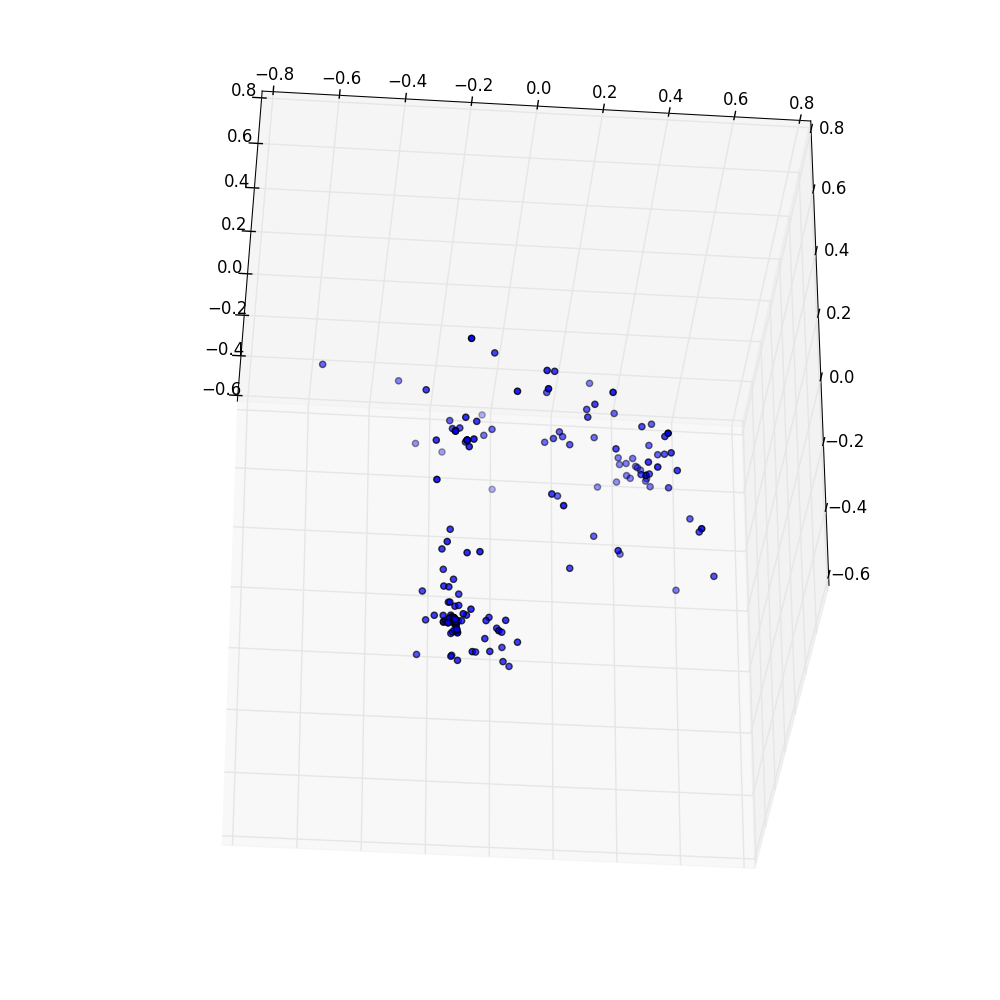

In [54]:
from mpl_toolkits.mplot3d import Axes3D

mds = MDS(n_components=3, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
fig = plt.figure(figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2])
# for x, y, z, s in zip(pos[:, 0], pos[:, 1], pos[:, 2], names):
#     ax.text(x, y, z, s)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


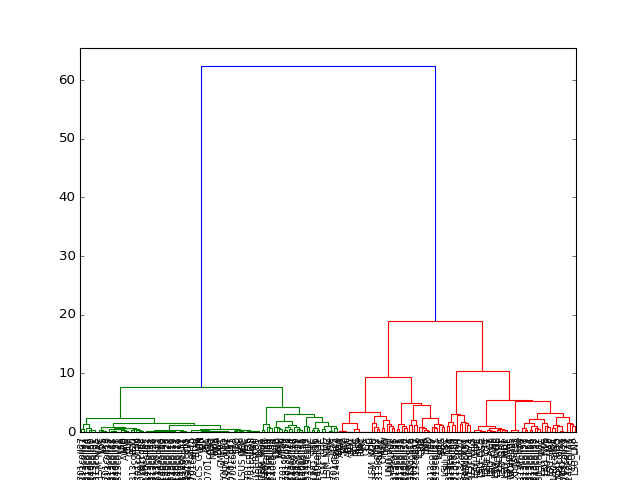

In [56]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist)

# match dendrogram to that returned by R's hclust()
dendrogram(linkage_matrix, orientation="top", labels=names, leaf_font_size='8')


#plt.tight_layout()  # fixes margins

plt.show()